In [1]:
%matplotlib inline

import os
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
os.chdir('../../util/')
from dbda2e_utilities import gamma_sh_ra_from_mean_sd, gamma_sh_ra_from_mode_sd
np.random.seed(2)
from jags_ydich_xnomssubj_mbinombetaomegakappa_example import jags_ydich_xnomssubj_mbinombetaomegakappa_example

**Exercise 9.1. [Purpose: Try different priors on kappa to explore the role of kappa in shrinkage.]** Consider the analysis of the therapeutic touch data in Figure 9.10, p.243. The analysis used a generic gamma distributed prior on kappa that had a *mean* of 1.0 and a standard deviation of 10.0. We assumed that the prior had minimal influence on the results; here, we examine the robustness of the posterior when we change the prior to other reasonably vague and noncommittal distributions. In particular, we will examine a gamma distributed prior on kappa that had a *mode* of 1.0 and a standard deviation of 10.0.

**(A)** What are the shape and rate parameters for a gamma distribution that has mean of 1.0 and standard deviation of 10.0? What are the shape and rate parameters for a gamma distribution that has a mode of 1.0 and standard deviation of 10.0? *Hint:* use the utility functions `gammaShRaFromMeanSD` and `gammaShRaFromModeSD`.

In [2]:
# In this cell and the next one, the first returned value is the shape parameter and the second one is 
# the rate parameter
gamma_sh_ra_from_mean_sd(1, 10)

[0.01, 0.01]

In [3]:
gamma_sh_ra_from_mode_sd(1, 10)

[1.105124921972504, 0.10512492197250393]

**(B)** Plot the two gamma distributions, superimposed, to see which values of kappa they emphasise. 

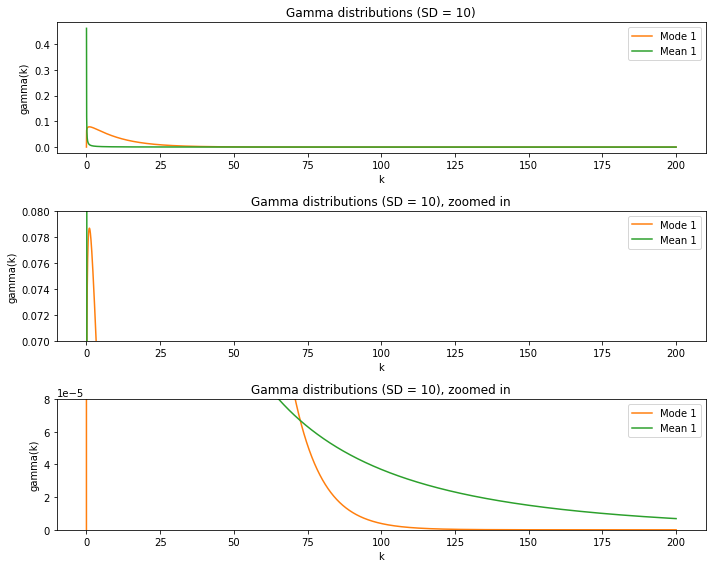

In [35]:
fig, ax = plt.subplots(3)
k = np.linspace(0, 200, 10001)
for i in range(3):
    ax[i].plot(k, gamma(1.1051249, scale = 1.0 / 0.1051249).pdf(k), color = 'C01') 
    ax[i].plot(k, gamma(0.01, scale = 1.0 / 0.01).pdf(k), color = 'C02') 
    ax[i].legend(['Mode 1', 'Mean 1'])
    ax[i].set_xlabel('k')
    ax[i].set_ylabel('gamma(k)')
ax[0].set_title('Gamma distributions (SD = 10)')
ax[1].set_ylim(0.07, 0.08)
ax[1].set_title('Gamma distributions (SD = 10), zoomed in')
ax[2].set_ylim(0, 8e-5)
ax[2].set_title('Gamma distributions (SD = 10), zoomed in')
fig.set_figwidth(10)
fig.set_figheight(8)
plt.tight_layout()

Relative to each other, which gamma distribution favours values of kappa between about 0.1 and 75? Which gamma distribution favours values of kappa that are tiny or greater than 75?

The distribution with mode = 1 favours values of kappa between 0.1 and 75.

The distribution with mean = 1 favlurs values of kappa that are tiny or greater than 75.

In [ ]:
jags_ydich_xnomssubj_mbinombetaomegakappa_example()